In [9]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

# Load the data
data = pd.read_csv('/content/LeakageEnergy.csv', delimiter=',')

# Separate features (X) and target variable (y)
X = data.iloc[:, :2]  # First two columns: MemCellType and numRowSubArray/numColSubArray
y = data.iloc[:, 2:]  # Columns from position 2 onwards: Layer1, Layer2, ...


# Create and fit the model
model = RandomForestRegressor(n_estimators=100, random_state=40)
model.fit(X, y)

# Now you can use this model to predict leakage energy for new data
# For example, if you want to predict leakage energy for MemCellType=1, numRowSubArray/numColSubArray=64, and Layer=10
new_data = pd.DataFrame({
    'MemCellType': [1],
    'numRowSubArray/numColSubArray': [512]
})
training_accuracy = model.score(X, y)
print(f"Training Accuracy: {training_accuracy*100}%")
# Predicting leakage energy for new data
predicted_leakage_energy = model.predict(new_data)
print("Predicted Leakage Energy:", predicted_leakage_energy)


Training Accuracy: 85.03114972963544%
Predicted Leakage Energy: [[  207.12069   414.24139  6394.7076    414.24139  6344.2709    414.24139
   6297.7648    414.24139 13664.1789    414.24139 14163.2374    414.24139
  14611.702     414.24139   350.23951  2589.6511    344.22735  5194.2272
    338.21462  5186.45      332.20189  5178.6737    326.18916  5171.0337
    320.17643  5163.3936    307.21803   461.60627  6324.4456    460.09817
   6322.9957    458.6001   6321.5429    457.09174  6320.0847    455.59354
   6318.7719    454.08557  9483.3066    596.67528]]


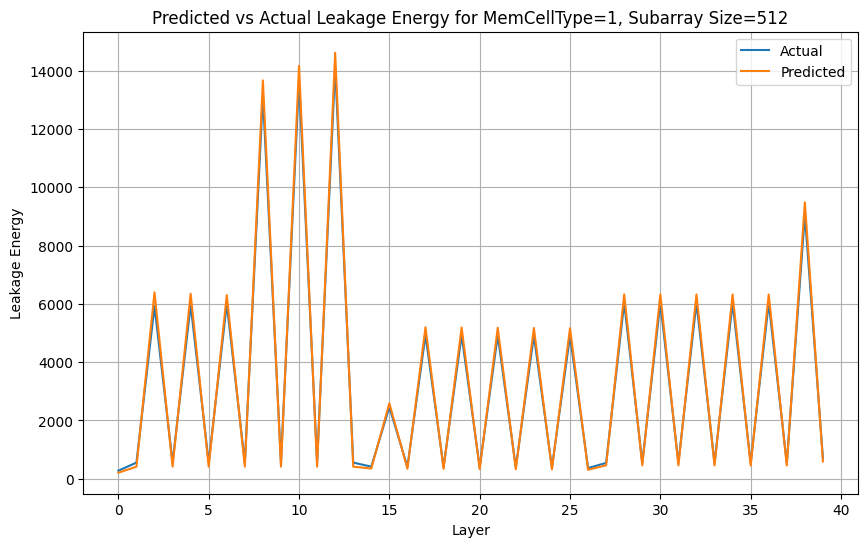

In [10]:
import matplotlib.pyplot as plt

# Choose MemCellType and numRowSubArray/numColSubArray
mem_cell_type = 1
subarray_size = 512

# Filter the training data for the chosen MemCellType and numRowSubArray/numColSubArray
filtered_data = data[(data['MemCellType'] == mem_cell_type) & (data['numRowSubArray/numColSubArray'] == subarray_size)]

# Extract the actual LeakageEnergy values
actual_values = filtered_data.iloc[:, 2:]

# Plot the predicted LeakageEnergy and the actual LeakageEnergy values
plt.figure(figsize=(10, 6))
plt.plot(actual_values.values[0], label='Actual')
plt.plot(predicted_leakage_energy[0], label='Predicted')
plt.xlabel('Layer')
plt.ylabel('Leakage Energy')
plt.title(f'Predicted vs Actual Leakage Energy for MemCellType={mem_cell_type}, Subarray Size={subarray_size}')
plt.legend()
plt.grid(True)
plt.show()


Training Accuracy: 0.8321206651332218


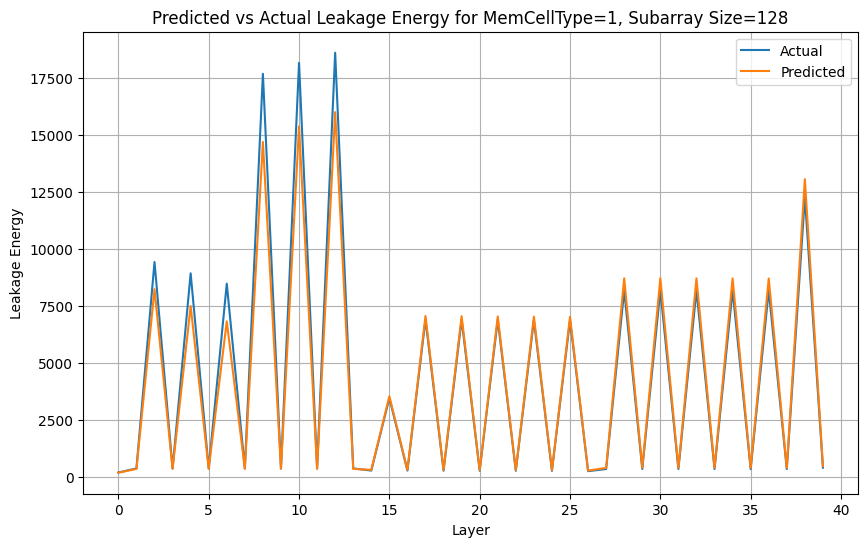

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('/content/LeakageEnergy.csv', delimiter=',')

# Remove 'u' character from the values in the DataFrame
data = data.applymap(lambda x: float(x[:-1]) if isinstance(x, str) and x.endswith('u') else x)

# Separate features (X) and target variable (y)
X = data.iloc[:, :2]  # First two columns: MemCellType and numRowSubArray/numColSubArray
y = data.iloc[:, 2:]  # Columns from position 2 onwards: Layer1, Layer2, ...

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the model
model = RandomForestRegressor(n_estimators=100, random_state=35)
model.fit(X_train, y_train)

# Predicting LeakageEnergy for the testing data
predicted_leakage_energy_test = model.predict(X_test)

# Plot a graph comparing the predicted and actual LeakageEnergy values for a specific MemCellType and numRowSubArray/numColSubArray
mem_cell_type = 1
subarray_size = 128
training_accuracy = model.score(X, y)
print(f"Training Accuracy: {training_accuracy}")

# Filter the testing data for the chosen MemCellType and numRowSubArray/numColSubArray
filtered_data_test = X_test[(X_test['MemCellType'] == mem_cell_type) & (X_test['numRowSubArray/numColSubArray'] == subarray_size)]

if not filtered_data_test.empty:
    index_test = filtered_data_test.index[0]

    # Extract the actual LeakageEnergy values for the chosen MemCellType and numRowSubArray/numColSubArray
    actual_values_test = y_test.iloc[index_test]

    # Plot the predicted and actual LeakageEnergy values
    plt.figure(figsize=(10, 6))
    plt.plot(actual_values_test.values, label='Actual')
    plt.plot(predicted_leakage_energy_test[index_test], label='Predicted')
    plt.xlabel('Layer')
    plt.ylabel('Leakage Energy')
    plt.title(f'Predicted vs Actual Leakage Energy for MemCellType={mem_cell_type}, Subarray Size={subarray_size}')
    plt.legend()
    plt.grid(True)
    plt.show()
else:
    print("No data found for the specified MemCellType and Subarray Size.")
